
## ######################

Task - Predict the diamond price.💎
Write the KNN code from scratch and make it work on the given dataset ?

Step - 1: Load the data
Step - 2: Perform the EDA on the given dataset
Step - 3: Handle Categorical Columns i.e. convert them to numerical representation (TODO - Wisely choose between LabelEncoding and OneHotEncoding)
Step - 4: Normalize the data
Step - 5: Split the data - Test and Train (recommended 75:25 split)
Step - 6: Build KNN Algorithm from scratch and do the predictions for test data. You should not use the sklearn KNN algorithm here. Write the complete code implementation on KNN.
Step - 7: Evaluate your model
Step - 8: Train a model using sklearn KNN Algorithm and compare the results with your scratch implementation

Dos - 
1.	You can use sklearn for standardizing and splitting the dataset to train and test
2.	Scratch implementation of sklearn’s KNN fit function
3.	You can use library functions for LabelEncoder or OneHotEncoder  
4.	Use Jupyter Notebook to implement your work 
5.	Eat, Sleep, Code repeat

Don’t - 
1.	Plagiarism 
2.	Procrastination
## #####

1. Title : Diamonds Dataset

2. the 7th column "price" is the values to be predicted.

3. Data Type : Mixed ( Numerical + Categorical)
	
4. Dataset has nearly 54000 instances.

5. It has 10 features.

6. Features 

	price : price in US dollars (\$326--\$18,823)

	carat : weight of the diamond (0.2--5.01)

	cut   : quality of the cut (Fair, Good, Very Good, Premium, Ideal)

	color : diamond colour, from J (worst) to D (best)

	clarity : a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

	x : length in mm (0--10.74)

	y : width in mm (0--58.9)

	z : depth in mm (0--31.8)

	depth : total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

	table : width of top of diamond relative to widest point (43--95)

7. Caution : Handle Categorical data before building a model. 


## Data Loading


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
data = pd.read_csv('data/diamonds.csv')


## Checking for Duplicates and null values and dropping them

In [3]:
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

Conclusion: No nulls in entire dataframe

In [4]:
data.duplicated().sum()

146

## there are 146 duplicates in the dataframe 
action : remove them


In [5]:
data.drop_duplicates(inplace=True)

In [6]:
data.duplicated().sum()

0

In [7]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53794 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53794 non-null  float64
 1   cut      53794 non-null  object 
 2   color    53794 non-null  object 
 3   clarity  53794 non-null  object 
 4   depth    53794 non-null  float64
 5   table    53794 non-null  float64
 6   price    53794 non-null  int64  
 7   x        53794 non-null  float64
 8   y        53794 non-null  float64
 9   z        53794 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [9]:
data.shape

(53794, 10)

# Splitting inputs and target features

### Problem Statement - Given Diamond data set, need tom predict the 'price' of a diamond

#### taget : Price--> int64 --> a real value
#### as target is available in training data , this will be the supervised learning and the task is Regression

In [10]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [11]:
data.drop('depth',axis=1,inplace=True)

## Target and input features splitting

In [12]:
y = data['price']

x = data.drop('price',axis=1)

print(x.columns, y)

Index(['carat', 'cut', 'color', 'clarity', 'table', 'x', 'y', 'z'], dtype='object') 0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53794, dtype: int64


In [13]:
import sklearn

In [14]:
# split into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=100)

In [15]:
print(X_train.shape, y_train.shape)

print(X_test.shape, y_test.shape)

X_test.head()

(40345, 8) (40345,)
(13449, 8) (13449,)


,carat,cut,color,clarity,table,x,y,z
28501,0.40,Ideal,E,SI1,54.0,4.74,4.78,2.96
41345,0.54,Ideal,I,VS1,54.0,5.26,5.30,3.25
37241,0.50,Good,F,SI1,57.0,5.03,4.94,3.21
3002,0.81,Ideal,F,SI2,56.0,5.95,6.00,3.71
36278,0.34,Very Good,E,SI2,56.0,4.45,4.48,2.81


###  Separating Categorical and Numerical Columns: 

In [16]:
X_train_cat = X_train.select_dtypes(include=['object'])

X_train_num = X_train.select_dtypes(include=['int64','float64'])

In [17]:
X_train_cat.columns

Index(['cut', 'color', 'clarity'], dtype='object')

In [18]:
X_train_num.columns

Index(['carat', 'table', 'x', 'y', 'z'], dtype='object')

## Scaling the Numerical Features

In [19]:
X_train_num.head()

,carat,table,x,y,z
29342,0.31,57.0,4.43,4.40,2.63
3261,0.70,57.0,5.74,5.79,3.47
52074,0.70,56.0,5.69,5.63,3.59
5445,0.90,59.0,6.14,6.10,3.88
10677,1.21,59.0,6.92,6.86,4.13


In [20]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

X_train_num_rescaled = pd.DataFrame(std_scaler.fit_transform(X_train_num), 
                                    columns = X_train_num.columns, 
                                    index = X_train_num.index)

X_train_num_rescaled.head()

,carat,table,x,y,z
29342,-1.030279,-0.203136,-1.160218,-1.159730,-1.282702
3261,-0.207788,-0.203136,0.006803,0.046610,-0.098474
52074,-0.207788,-0.650819,-0.037740,-0.092249,0.070702
5445,0.214002,0.692231,0.363145,0.315650,0.479542
10677,0.867776,0.692231,1.058013,0.975232,0.831991


### Categorical Columns -- identification of nomial and ordinal features

In [21]:
X_train_cat.head()

,cut,color,clarity
29342,Ideal,G,VS2
3261,Ideal,F,VS1
52074,Very Good,F,VS2
5445,Very Good,J,SI1
10677,Premium,J,VS2


## Oridnal features : cut,color,clarity --> LabelEncoding

cut   : quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color : diamond colour, from J (worst) to D (best)

clarity : a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

In [22]:
data.cut.value_counts()

Ideal        21488
Premium      13748
Very Good    12069
Good          4891
Fair          1598
Name: cut, dtype: int64

In [23]:
data.color.value_counts()

G    11262
E     9776
F     9520
H     8272
D     6755
I     5407
J     2802
Name: color, dtype: int64

In [24]:
data.clarity.value_counts()

SI1     13032
VS2     12229
SI2      9150
VS1      8156
VVS2     5056
VVS1     3647
IF       1784
I1        740
Name: clarity, dtype: int64

In [25]:

cut_encoder = {"Fair":1,"Good":2,"Very Good":3,"Premium":4,"Ideal":5}
color_encoder = {"J":1,"I":2,"H":3,"G":4,"F":5,"E":6,"D":7}
clarity_encoder = {"I1":1,"SI2":2, "SI1":3, "VS2":4, "VS1":5, "VVS2":6, "VVS1":7, "IF":8}

X_train_cat['cut'] = X_train_cat['cut'].apply(lambda x : cut_encoder[x])

X_train_cat['color'] = X_train_cat['color'].apply(lambda x : color_encoder[x])

X_train_cat['clarity'] = X_train_cat['clarity'].apply(lambda x : clarity_encoder[x])

X_train_cat.head()

,cut,color,clarity
29342,5,4,4
3261,5,5,5
52074,3,5,4
5445,3,1,3
10677,4,1,4


## concating all numerical and categorial transformed features

In [26]:
X_train_transformed = pd.concat([X_train_num_rescaled,X_train_cat],axis=1)
X_train_transformed.head()

,carat,table,x,y,z,cut,color,clarity
29342,-1.030279,-0.203136,-1.160218,-1.159730,-1.282702,5,4,4
3261,-0.207788,-0.203136,0.006803,0.046610,-0.098474,5,5,5
52074,-0.207788,-0.650819,-0.037740,-0.092249,0.070702,3,5,4
5445,0.214002,0.692231,0.363145,0.315650,0.479542,3,1,3
10677,0.867776,0.692231,1.058013,0.975232,0.831991,4,1,4


## Preparing Test Data

In [27]:
X_test.head()

,carat,cut,color,clarity,table,x,y,z
28501,0.40,Ideal,E,SI1,54.0,4.74,4.78,2.96
41345,0.54,Ideal,I,VS1,54.0,5.26,5.30,3.25
37241,0.50,Good,F,SI1,57.0,5.03,4.94,3.21
3002,0.81,Ideal,F,SI2,56.0,5.95,6.00,3.71
36278,0.34,Very Good,E,SI2,56.0,4.45,4.48,2.81


In [28]:
X_test_cat = X_test.select_dtypes(include=['object'])

X_test_num = X_test.select_dtypes(include=['int64','float64'])

In [29]:
X_test_cat.head()

,cut,color,clarity
28501,Ideal,E,SI1
41345,Ideal,I,VS1
37241,Good,F,SI1
3002,Ideal,F,SI2
36278,Very Good,E,SI2


In [30]:
X_test_num.head()

,carat,table,x,y,z
28501,0.40,54.0,4.74,4.78,2.96
41345,0.54,54.0,5.26,5.30,3.25
37241,0.50,57.0,5.03,4.94,3.21
3002,0.81,56.0,5.95,6.00,3.71
36278,0.34,56.0,4.45,4.48,2.81


## Scaling the Numerical Features in test data

In [31]:
X_test_num_rescaled = pd.DataFrame(std_scaler.transform(X_test_num), 
                                    columns = X_test_num.columns, 
                                    index = X_test_num.index)

X_test_num_rescaled.head()

,carat,table,x,y,z
28501,-0.840474,-1.546186,-0.884053,-0.829939,-0.817470
41345,-0.545221,-1.546186,-0.420808,-0.378646,-0.408629
37241,-0.629579,-0.203136,-0.625705,-0.691080,-0.465021
3002,0.024196,-0.650819,0.193883,0.228863,0.239877
36278,-0.967011,-0.650819,-1.142401,-1.090300,-1.028939


### Categorical Columns  -- test data preprocessing

## Label Encoding 

In [32]:
X_test_cat['cut'] = X_test_cat['cut'].apply(lambda x : cut_encoder[x])

X_test_cat['color'] = X_test_cat['color'].apply(lambda x : color_encoder[x])

X_test_cat['clarity'] = X_test_cat['clarity'].apply(lambda x : clarity_encoder[x])

X_test_cat.head()

,cut,color,clarity
28501,5,6,3
41345,5,2,5
37241,2,5,3
3002,5,5,2
36278,3,6,2


## concating all numerical and categorial transformed test data features

In [33]:
X_test_transformed = pd.concat([X_test_num_rescaled,X_test_cat],axis=1)
X_test_transformed.head()

,carat,table,x,y,z,cut,color,clarity
28501,-0.840474,-1.546186,-0.884053,-0.829939,-0.817470,5,6,3
41345,-0.545221,-1.546186,-0.420808,-0.378646,-0.408629,5,2,5
37241,-0.629579,-0.203136,-0.625705,-0.691080,-0.465021,2,5,3
3002,0.024196,-0.650819,0.193883,0.228863,0.239877,5,5,2
36278,-0.967011,-0.650819,-1.142401,-1.090300,-1.028939,3,6,2


## KNN Regression from strach

### Steps:
- select and seprate datapoint from the given data (xq)
- calculate the distance between each datapoint and xq and store this distance
- Take the 5 smallest distances
- Take mean out of above 5 records price

In [34]:
print(X_test_transformed.index[0],y_test.index[0])


28501 28501


In [35]:
X_train_transformed.columns

Index(['carat', 'table', 'x', 'y', 'z', 'cut', 'color', 'clarity'], dtype='object')

In [36]:

X_train_transformed_array = np.array(X_train_transformed)

In [37]:
%%time
# calculating ecludian distance
import math

def y_predict(row):
    # calculating distance
    xq = np.array(row)
    distance = []
    distance = np.linalg.norm(X_train_transformed_array- xq,axis=1)
    distance_df = pd.DataFrame(distance,index=X_train_transformed.index,columns=['distances'])
    x_final = distance_df.sort_values('distances',ascending=True)[:5]
    return np.mean(y_train[y_train.index.isin(list(x_final.index))])

# predict the price
price = []
for row in X_test_transformed.values:
    price.append(y_predict(row))

Wall time: 1min 14s


Mean Absolute Error:  349.57250353186106


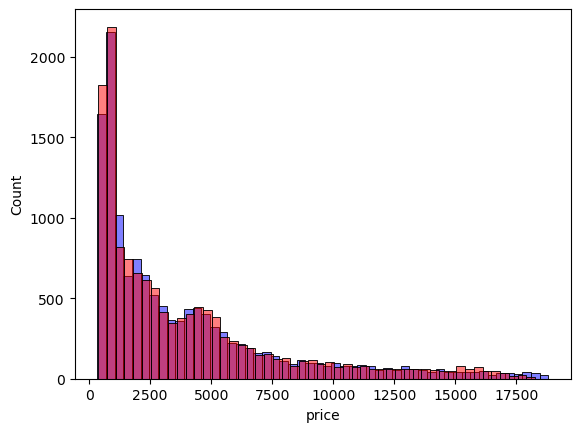

In [38]:
from sklearn import metrics

sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(price, color='red', alpha=0.5)

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, price))

## KNN Regression

Mean Absolute Error:  349.57628076436913
Wall time: 381 ms


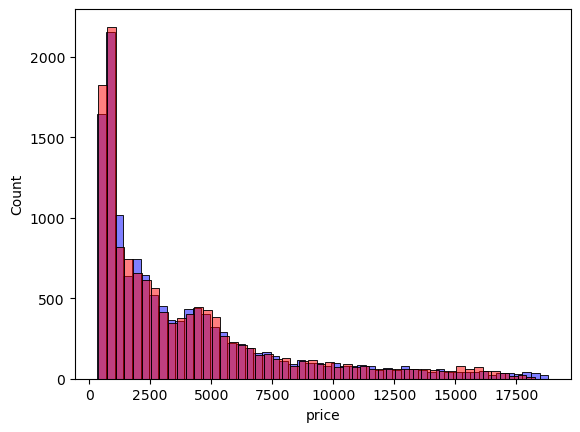

In [39]:
%%time
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

knn = KNeighborsRegressor()
knn.fit(X_train_transformed, y_train)

y_test_pred = knn.predict(X_test_transformed)

sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))